<a href="https://colab.research.google.com/github/Shreenidhi-Kovai-Sivabalan/Accurate-Energy-Demand-Prediction/blob/main/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appendix A


# Accurate Energy Demand Prediction for Smart Cities using Deep Learning
Project Code

Shreenidhi Kovai Sivabalan

Date of Submission: Oct 1, 2025

# A1. Data Preparation

In [ ]:
# Mounting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing and Prepping the Dataset

In [ ]:
# The dataset used for this project is Individual Household Electric Power Consumption from UCI Machine Learning Repository.
# dataset link - https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
# The dataset was uploaded to the drive to the filepath mentioned below.

filepath = '/content/drive/MyDrive/dissertation/data/household_power_consumption.txt'

In [ ]:
# The data was in text format (.txt file).
# It was formatted using:
# sep=';' - as the dataset is semicolon-delimited and not comma-separated
# na_values='?' - as missing values are represented with '?'
# 'Date' and 'Time' were parsed and combined to create 'Datetime'

data = pd.read_csv(filepath, sep=';', low_memory=False, na_values='?', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True)
data.head(10)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [ ]:
# Verifying the order of datetime

data.index.to_series().diff().value_counts()

,count
1.0,2075258


In [ ]:
# 'Datetime' was set as the index of the dataset.
# It is a common practice for time-series data.

data.set_index('Datetime', inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Printing the range of the dates on the data

print(f"Date Range: {data.index.min()} to {data.index.max()}")

Date Range: 2006-12-16 17:24:00 to 2010-11-26 21:02:00


# Initial EDA

In [ ]:
sns.set(style="whitegrid") #ensures the plots are styled nicely

In [ ]:
# Basic Checks on the datset

print("Shape of the dataset: ", data.shape) # shows the shape of the dataset - number of rows and columns
print("\nData types: ")
print(data.dtypes) # lists the datatypes of the columns
print("\nMissing values in each column: ")
print(data.isnull().sum()) # shows the number of missing values in each column

Shape of the dataset:  (2075259, 7)

Data types: 
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Missing values in each column: 
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
# Summary Statistics
print("Summary Statistics: ")
print(data.describe())

Summary Statistics: 
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%  

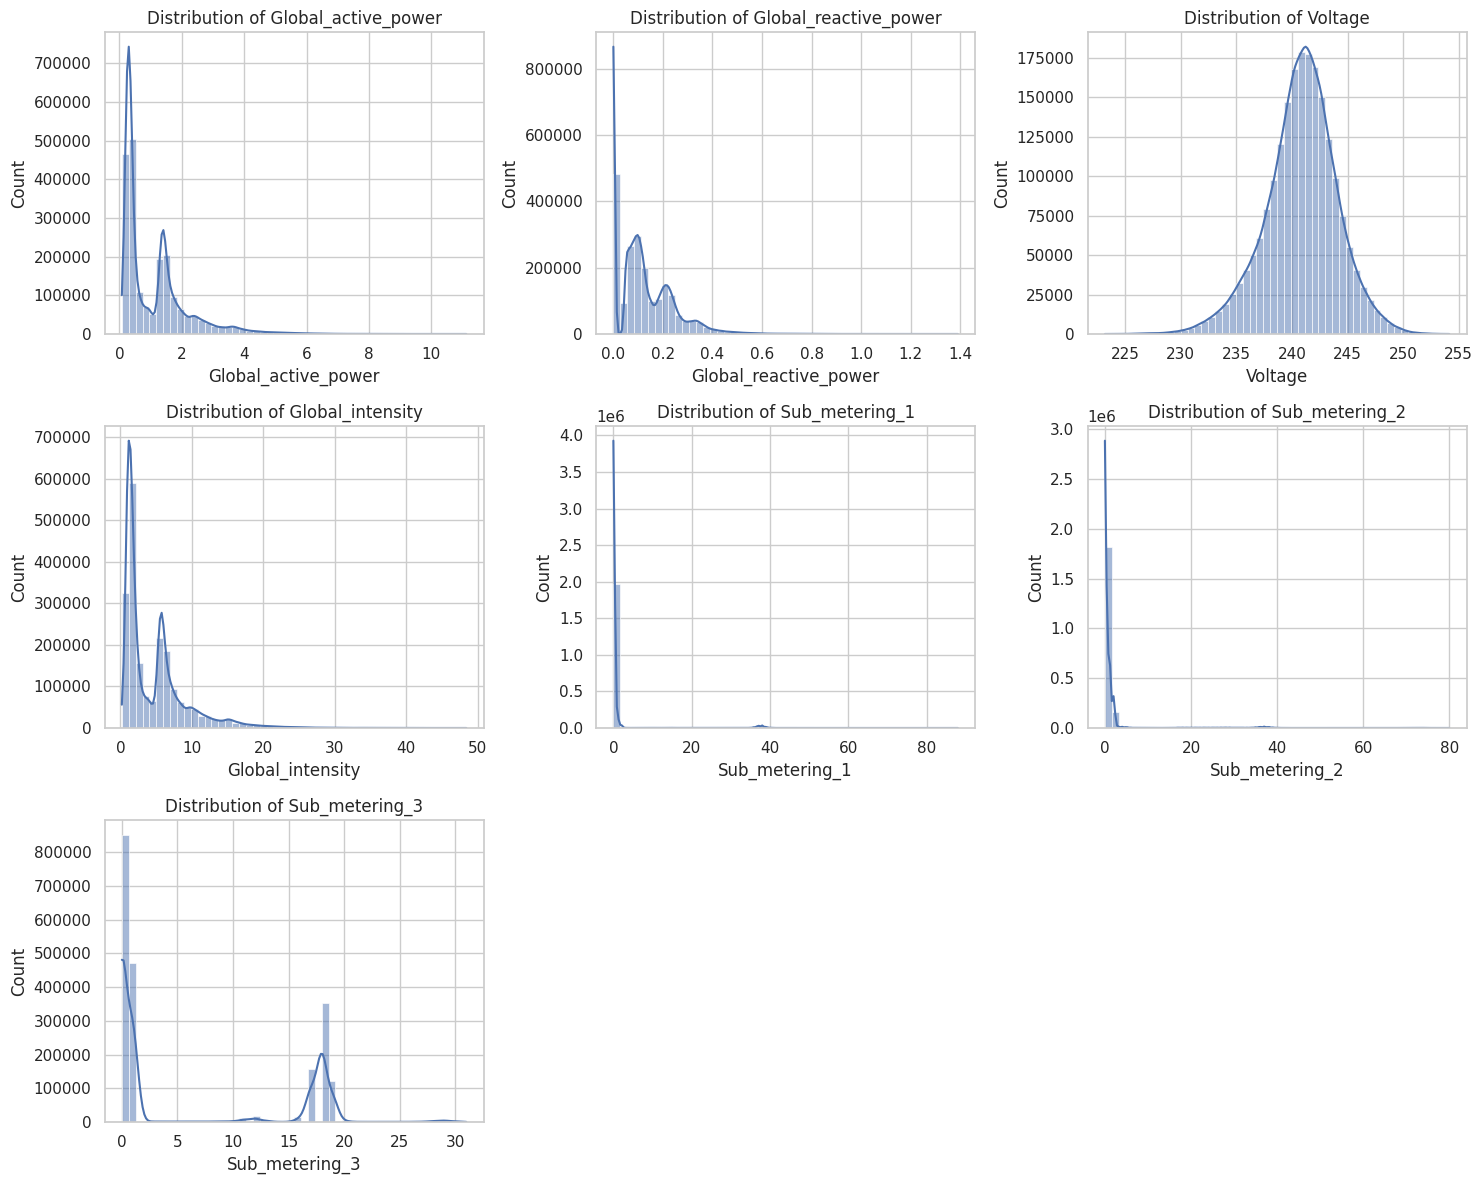

In [ ]:
# Distribution plots of the measured features of the dataset.
# This helps to get an overview of the range of the values present in each column.
# This also helps to check if the values are evenlt distributed or if they are skewed (could lead to potential bias)

num_cols = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
  plt.subplot((len(num_cols)+2)//3, 3, i)
  sns.histplot(data[col].dropna(), bins=50, kde=True)
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

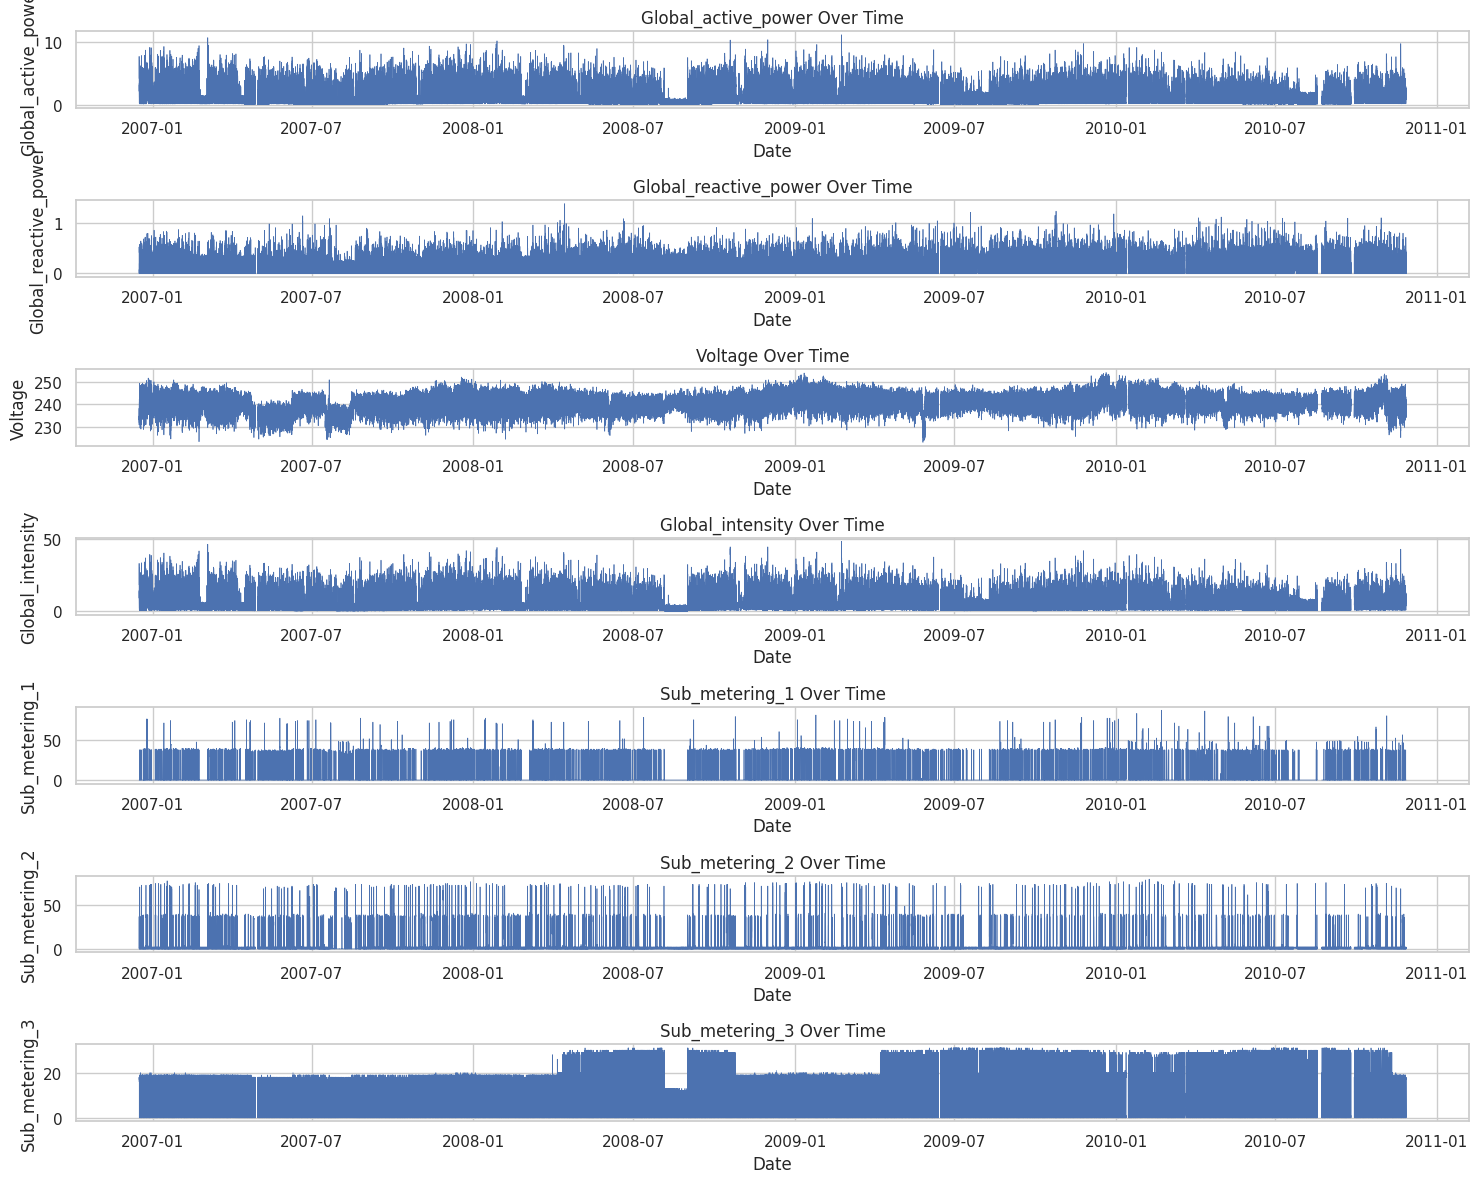

In [ ]:
# Time Series Visualisation
# Gives an idea of how the features has progressed over time.
# Helps to identify possible patterns in the time-series data.

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
  plt.subplot(len(num_cols), 1, i)
  plt.plot(data.index, data[col], linewidth=0.5)
  plt.title(f"{col} Over Time")
  plt.xlabel("Date")
  plt.ylabel(col)
plt.tight_layout()
plt.show()

Correlation Matrix: 
                        Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000      

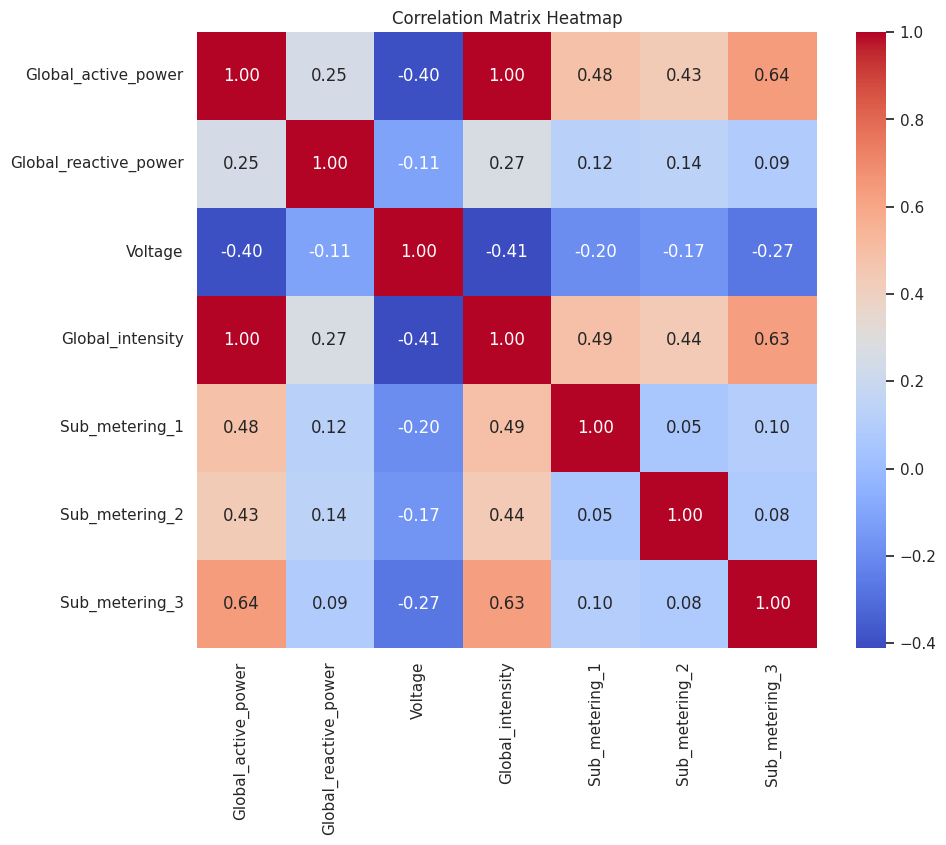

In [ ]:
# Correlation Matrix
# helps quantify the inter-dependecies of the features of the dataset

corr = data.corr()
print("Correlation Matrix: \n", corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: title={'center': 'Global Active Power by Minutes'}, xlabel='Datetime'>

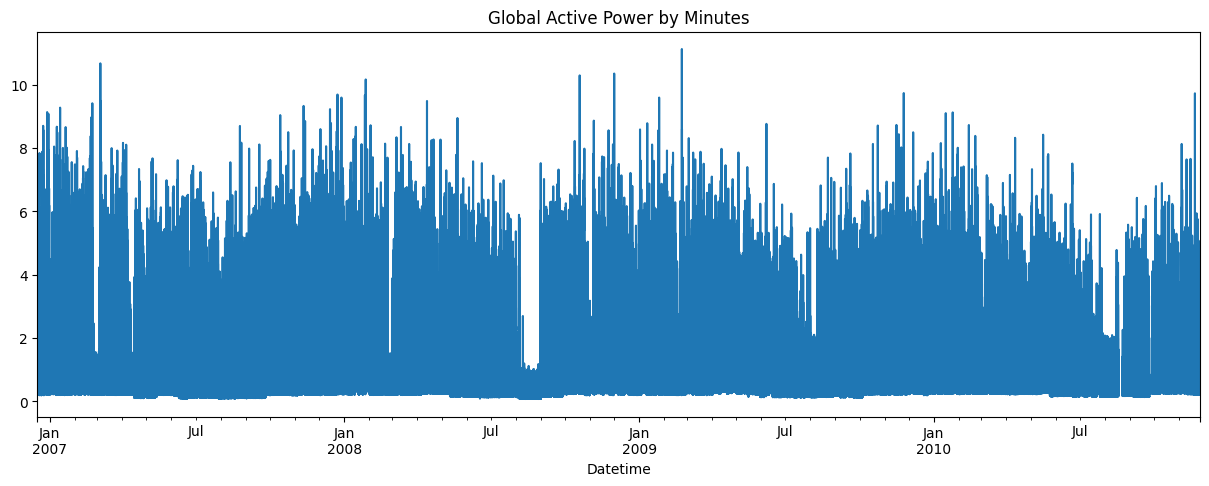

In [ ]:
# Visualising the distribution of the target variable (Global_active_power) on a minute-level over time

data['Global_active_power'].plot(figsize=(15, 5), title='Global Active Power by Minutes')

<Axes: title={'center': 'Global Active Power by Hours'}, xlabel='Datetime'>

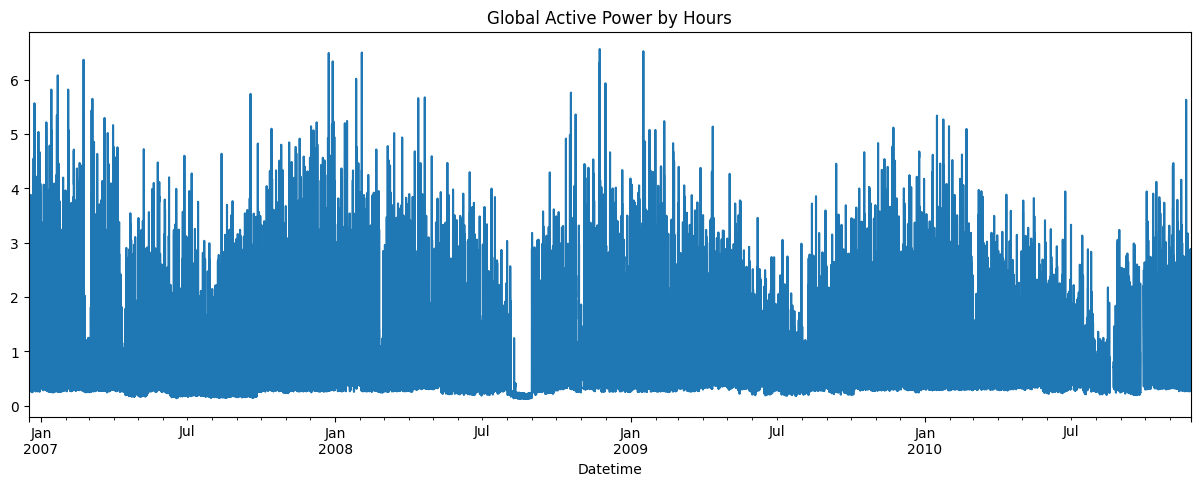

In [ ]:
# Visualising the distribution of the target variable on an hourly level over time.

data['Global_active_power']resample('H').mean().plot(figsize=(15, 5), title='Global Active Power by Hours')

<Axes: title={'center': 'Global Active Power by Days'}, xlabel='Datetime'>

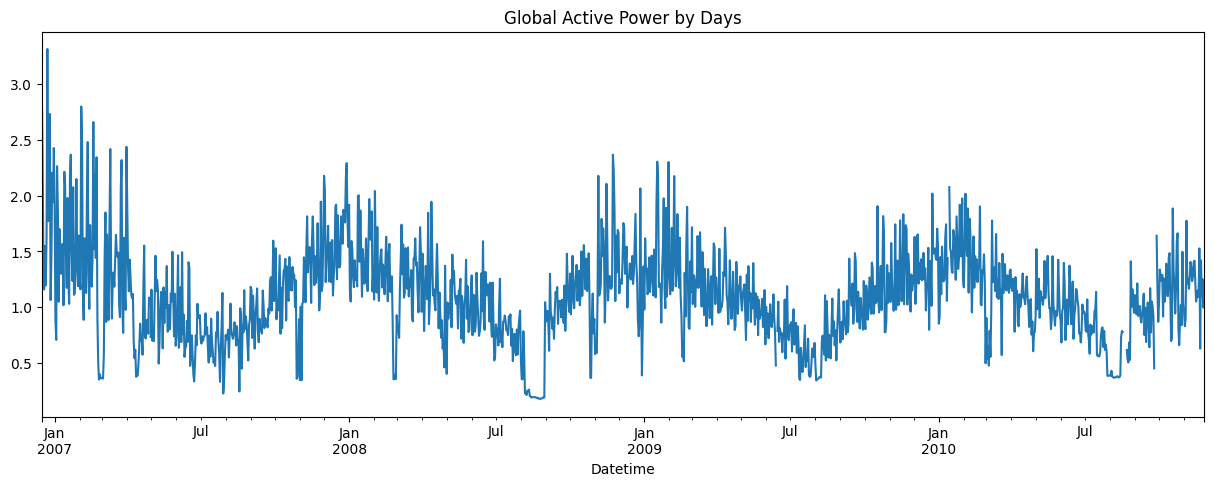

In [ ]:
# Visualising the distribution of the target variable on a daily level over time.
# A seasonal pattern can be seen. There's an increased energy usage around the months of December, January, February.
# The observed increase could be due to more energy consumption during winters as the use of heating appliances is more.

data['Global_active_power'].resample('D').mean().plot(figsize=(15, 5), title='Global Active Power by Days')

# Preprocessing

The following sites (along with the literature) were referred to formulate the preprocessing pipeline:


*   https://medium.com/@tubelwj/guide-to-time-series-data-pre-processing-methods-0a6df7ee054f
*   https://medium.com/enjoy-algorithm/pre-processing-of-time-series-data-c50f8a3e7a98
*   https://365datascience.com/tutorials/time-series-analysis-tutorials/pre-process-time-series-data/







**Handling Missing Values**

In [ ]:
# Interpolate Missing Values
# Linear interolation ensures smooth filling based on time trends

data = data.interpolate(method='time')

In [ ]:
# Checking if the missing values have been filled

data.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


Smoothing the Data

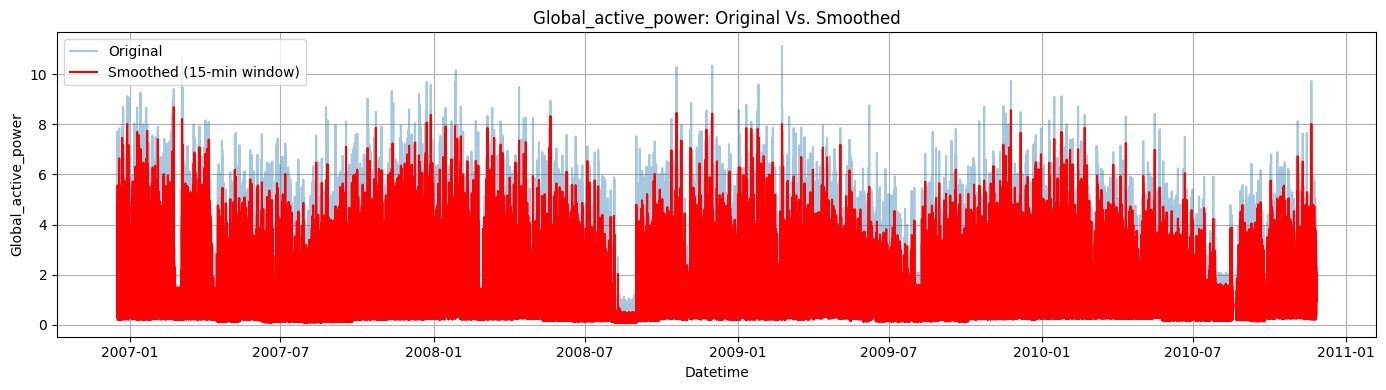

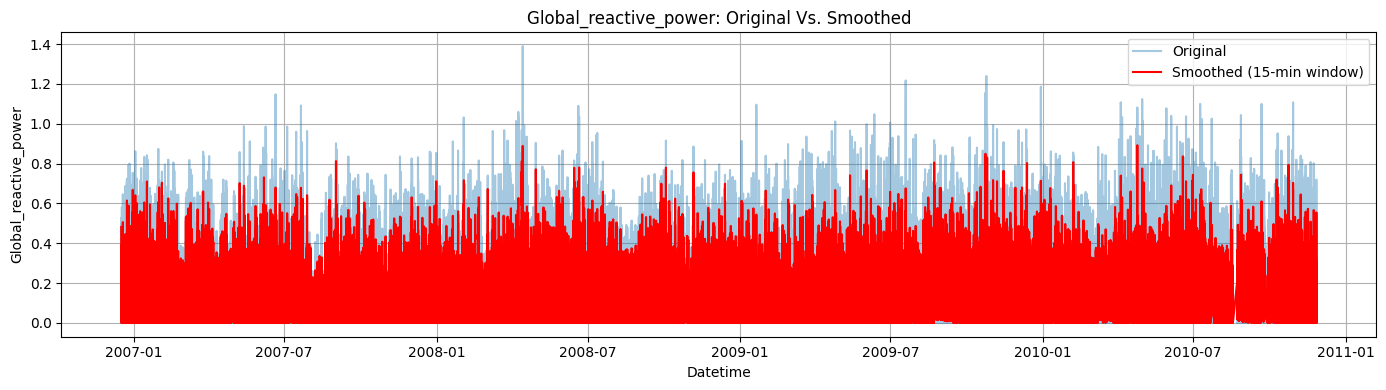

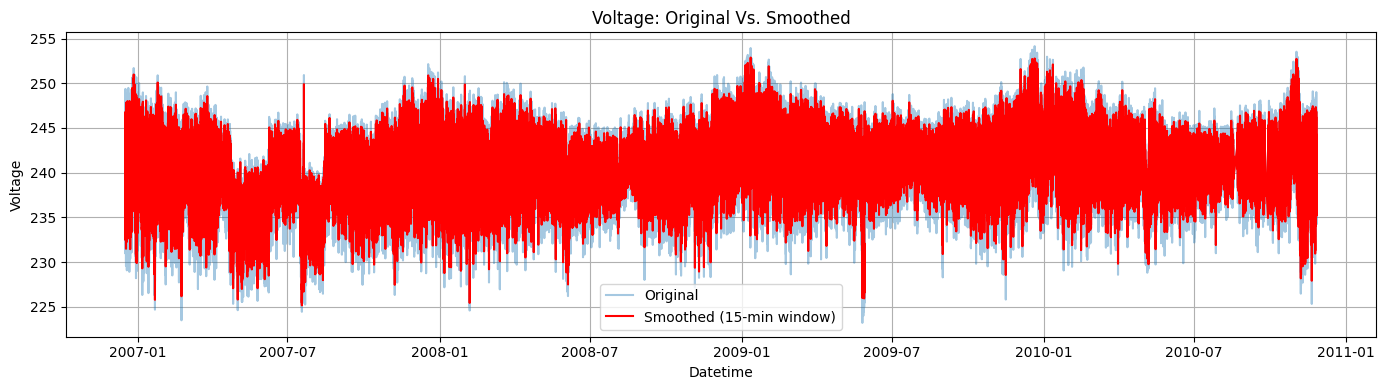

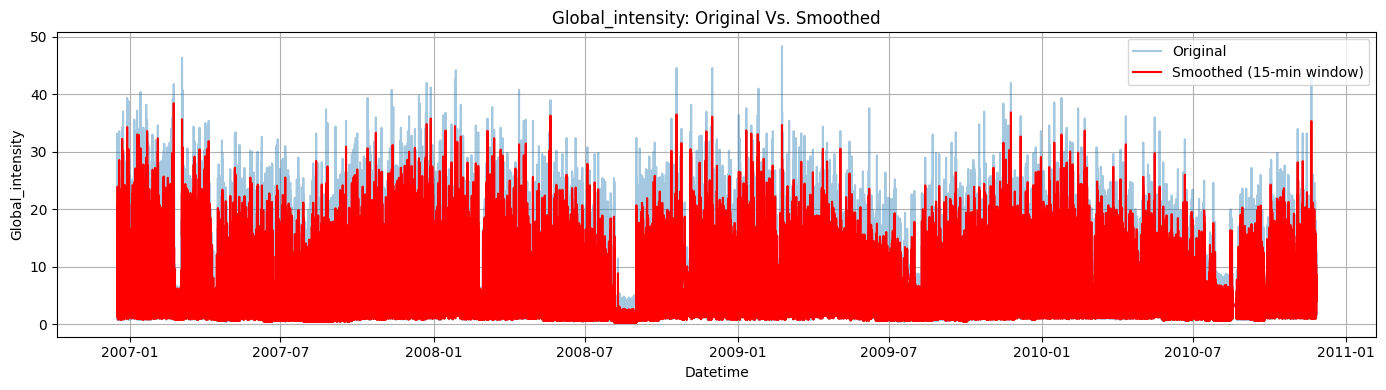

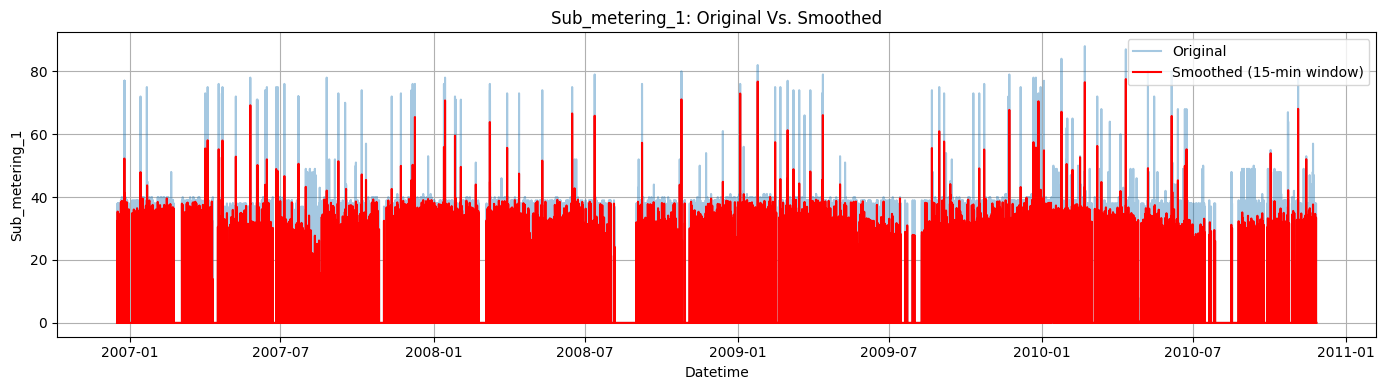

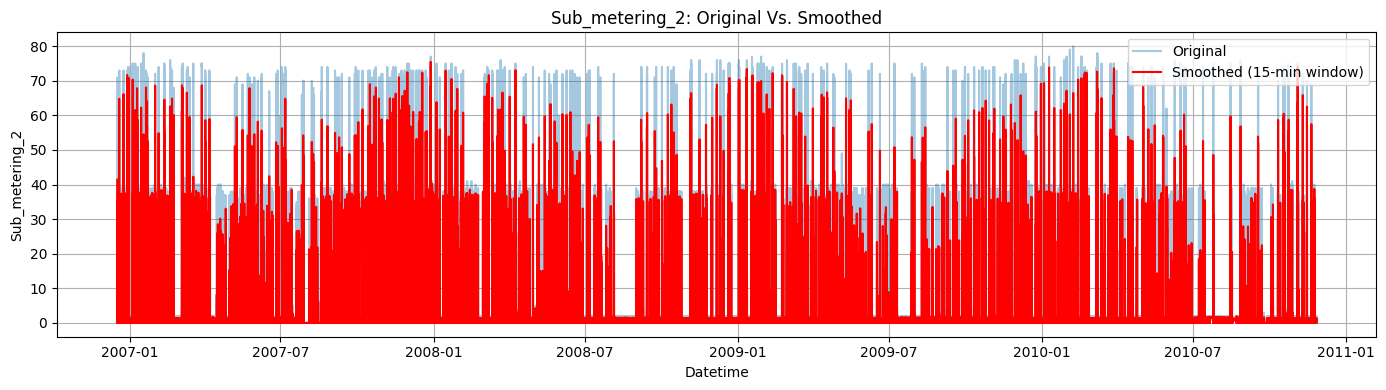

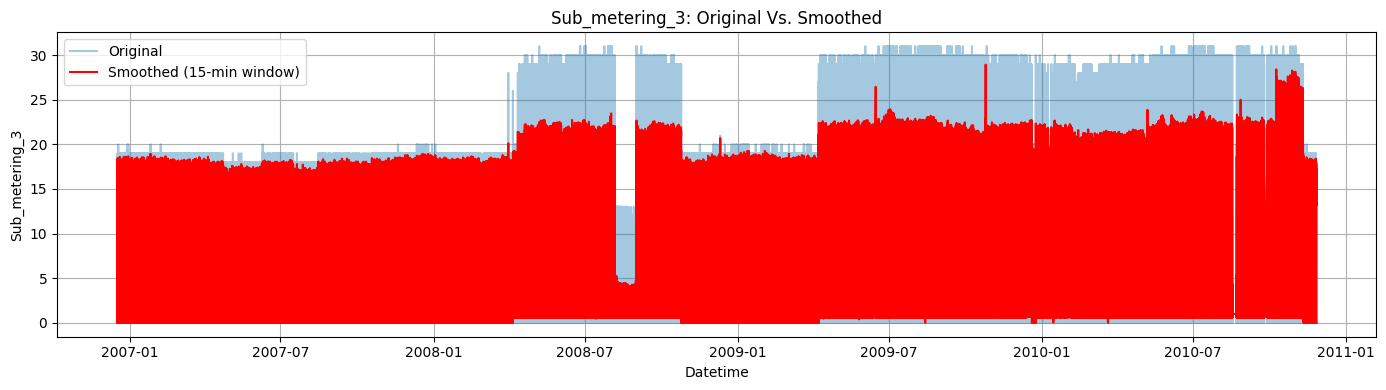

In [ ]:
# Smoothing Loop
# To visualise the effects of applying smoothing to each feature in the dataset.
# This would help to decide this particular dataset needs smoothing before it can be used for models.
# After analysing the graphs and considering the chosen models, smoothing was used just for visualisation.
# This is because complex models like LSTMs can process any noise that may be present in the data and use them for prediction.

data_copy = data.copy()
features = data_copy.select_dtypes(include='number').columns
window = 15

for col in features:
  plt.figure(figsize=(14, 4))
  plt.plot(data_copy.index, data_copy[col], label='Original', alpha=0.4)
  plt.plot(data_copy.index, data_copy[col].rolling(window=window).mean(), label=f'Smoothed ({window}-min window)', color='red')
  plt.title(f'{col}: Original Vs. Smoothed')
  plt.xlabel('Datetime')
  plt.ylabel(col)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

**Handling Outliers**

In [ ]:
# Detecting outliers with the help of Z-score
# This gives the number of outliers in the target variable (Gloal_active_power).

from scipy.stats import zscore

data_copy['z_score_gap'] = zscore(data_copy['Global_active_power'])

# Flagging Outliers -> if Z-score > 3 or < -3
outliers = data_copy[(data_copy['z_score_gap'].abs() > 3)]
print(f"Number of Outliers detected: {len(outliers)}")

Number of Outliers detected: 36671


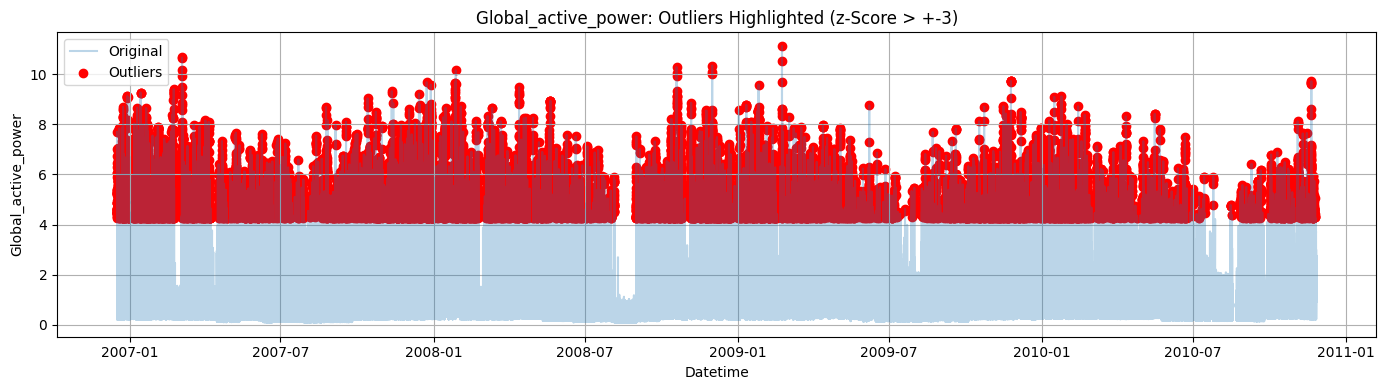

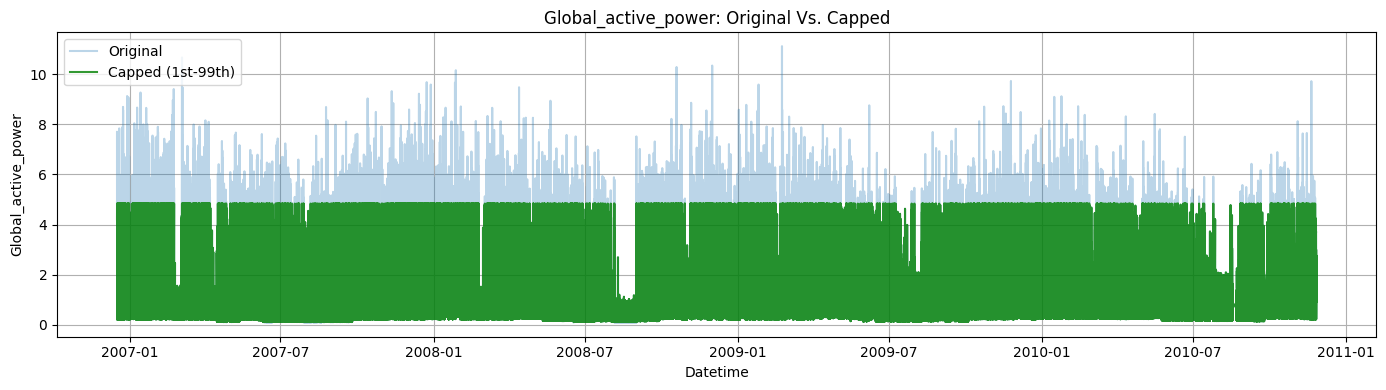

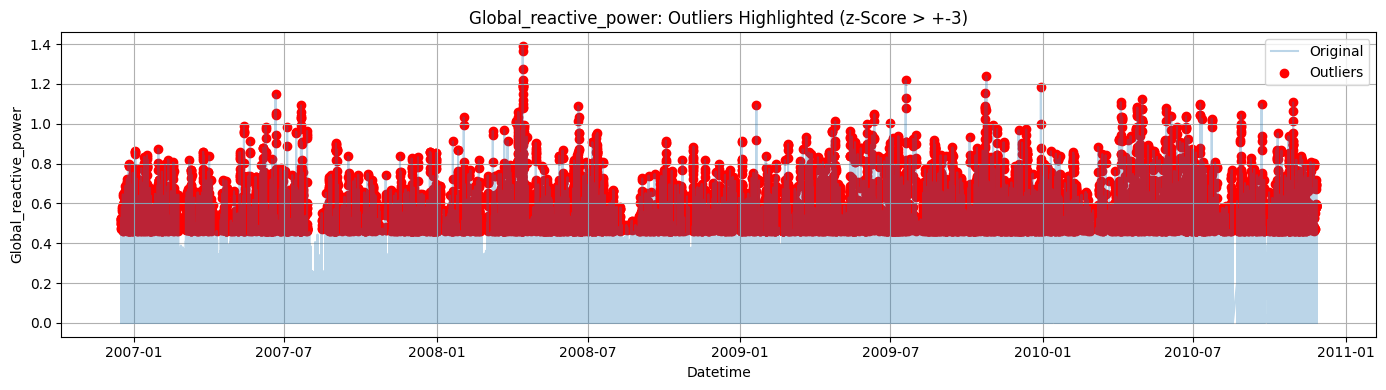

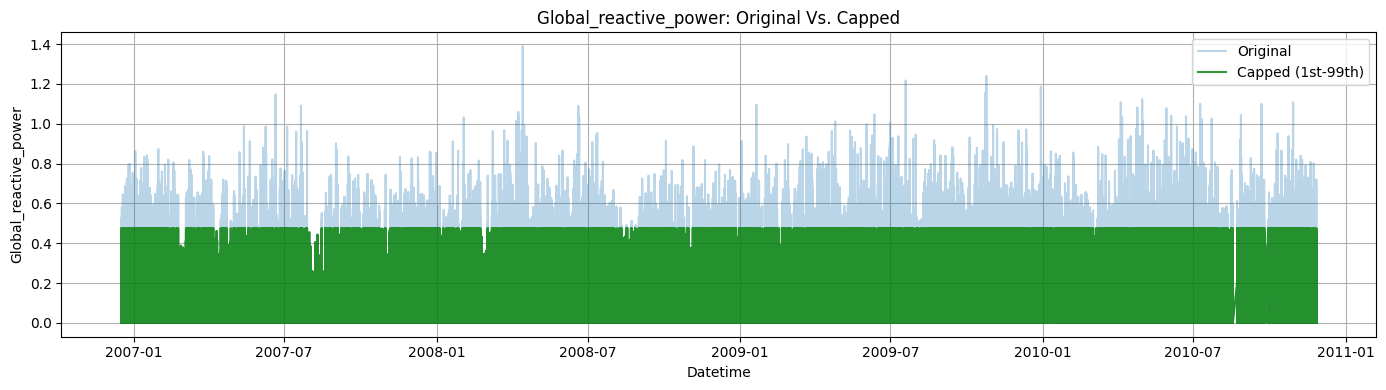

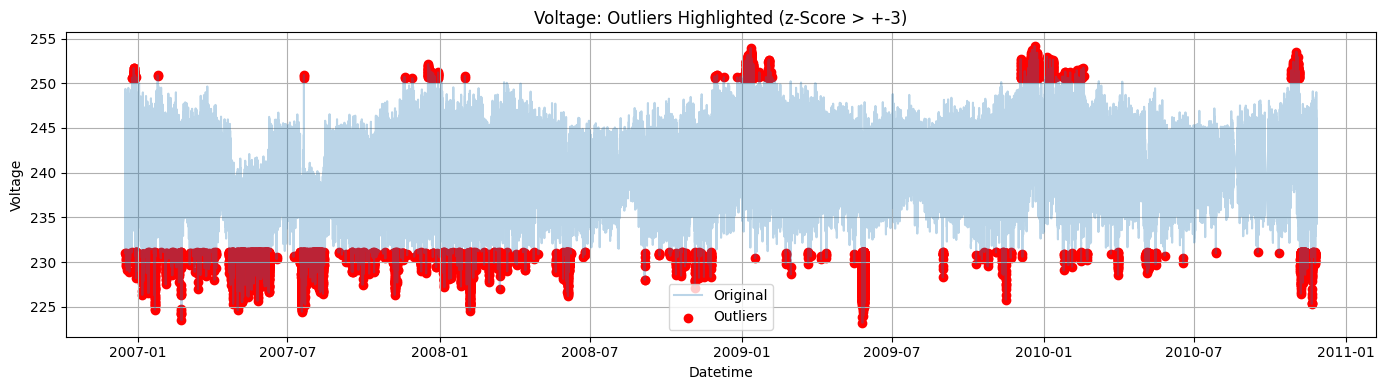

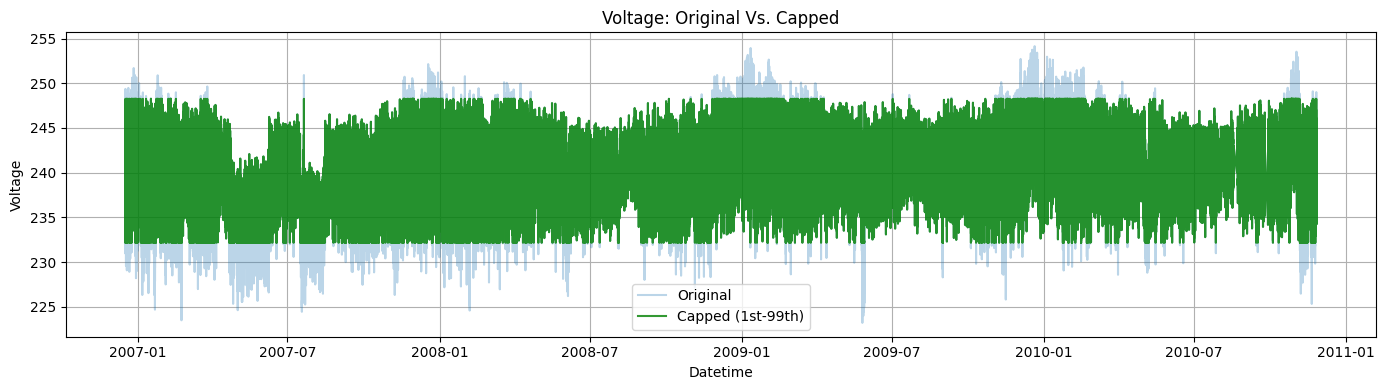

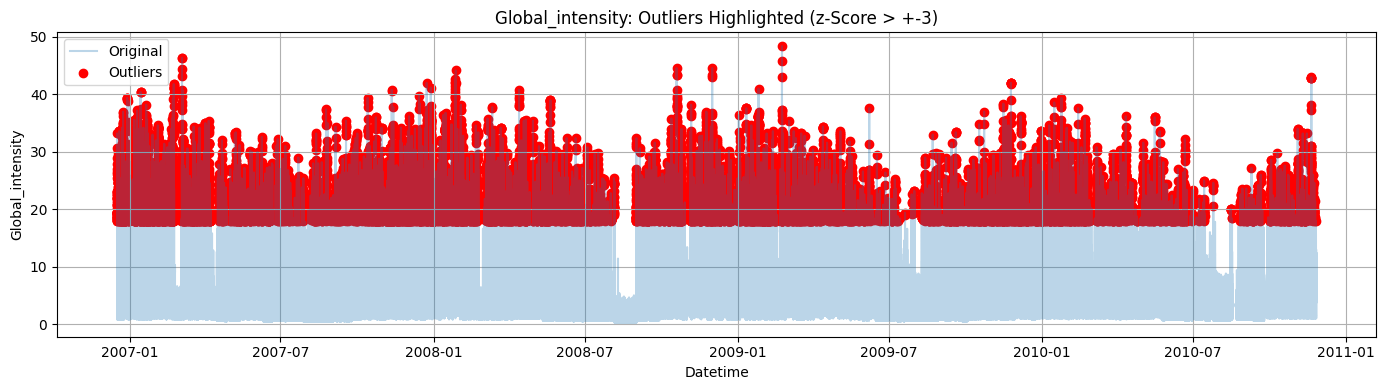

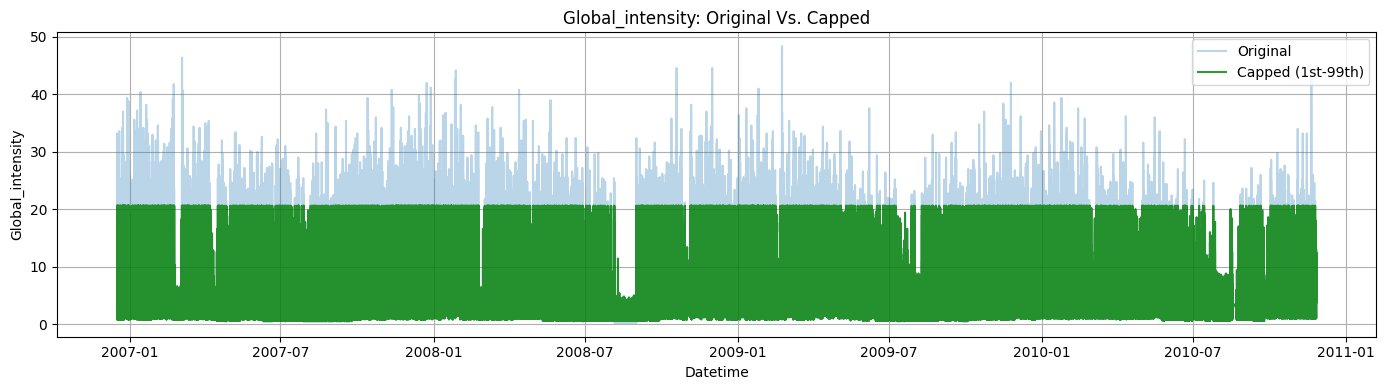

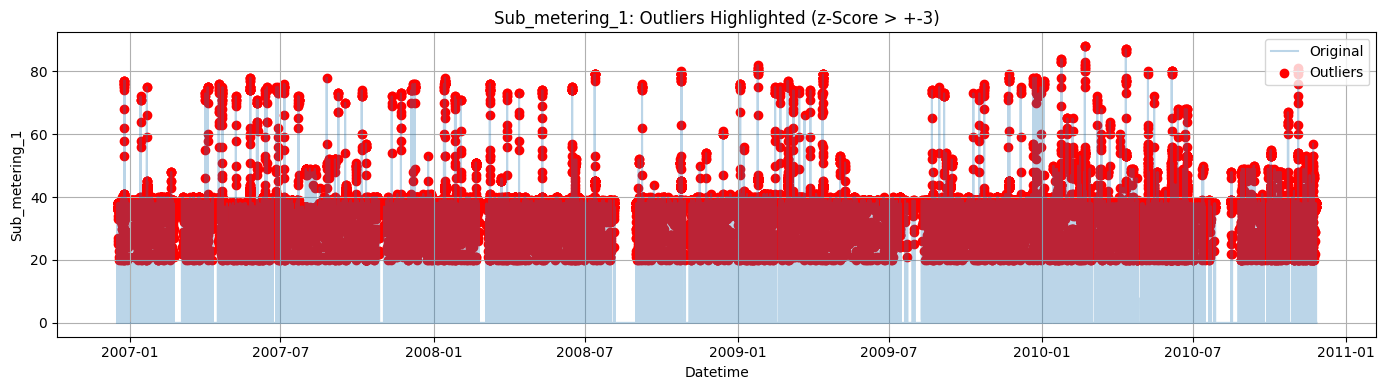

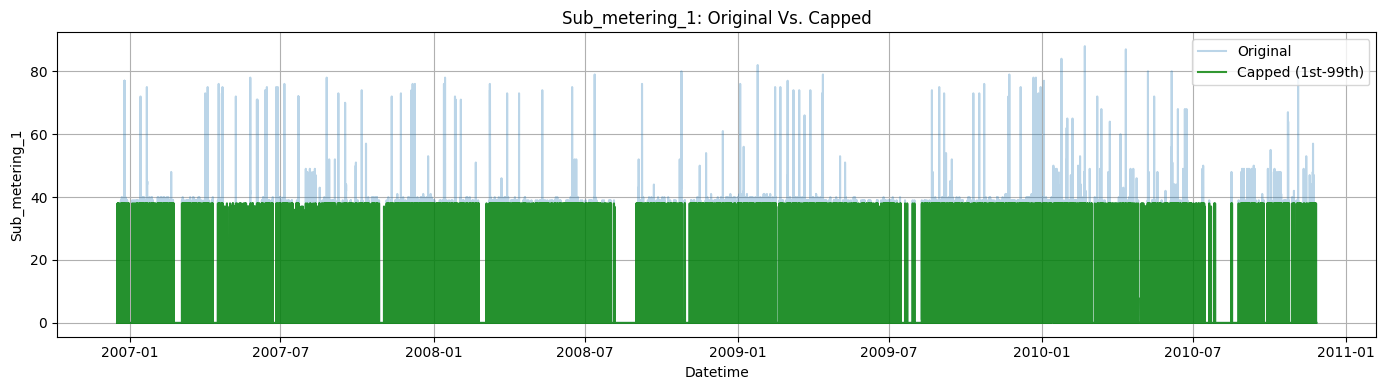

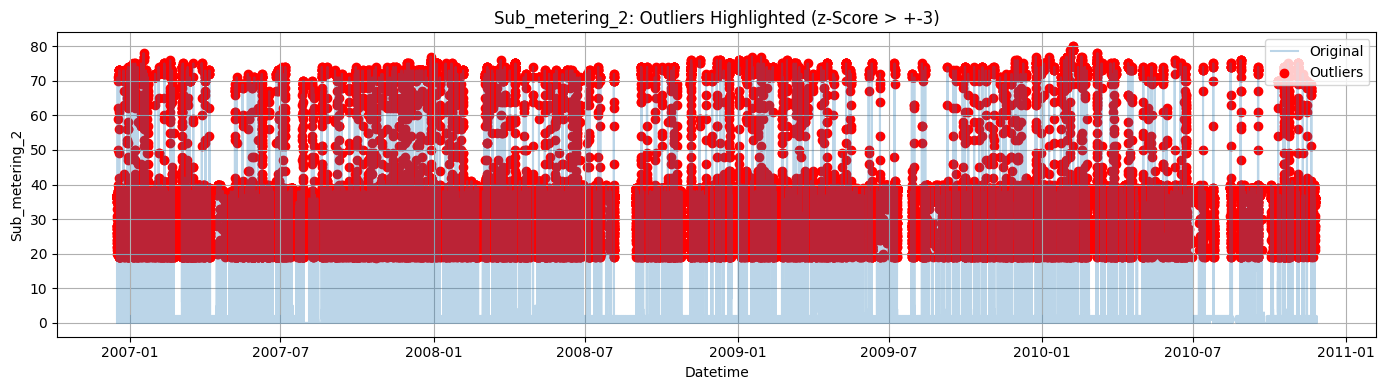

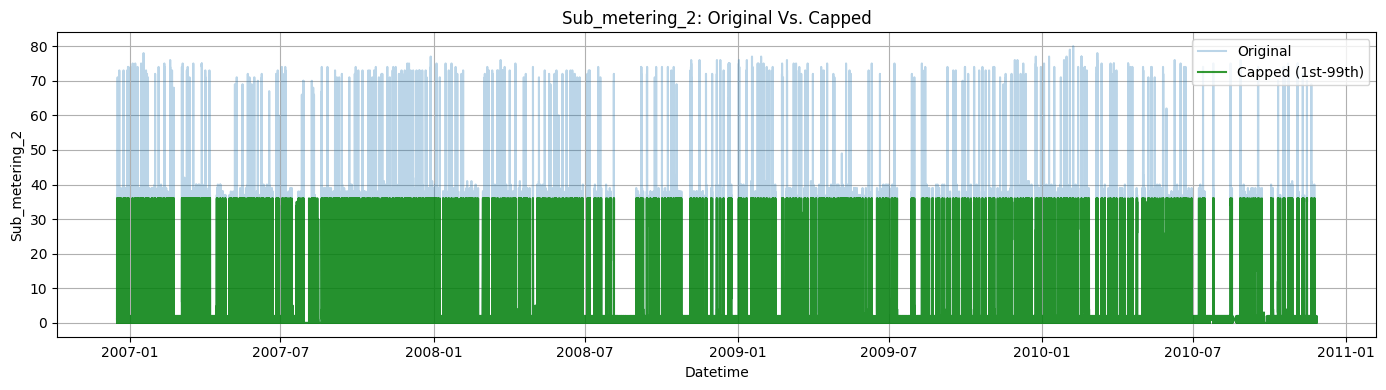

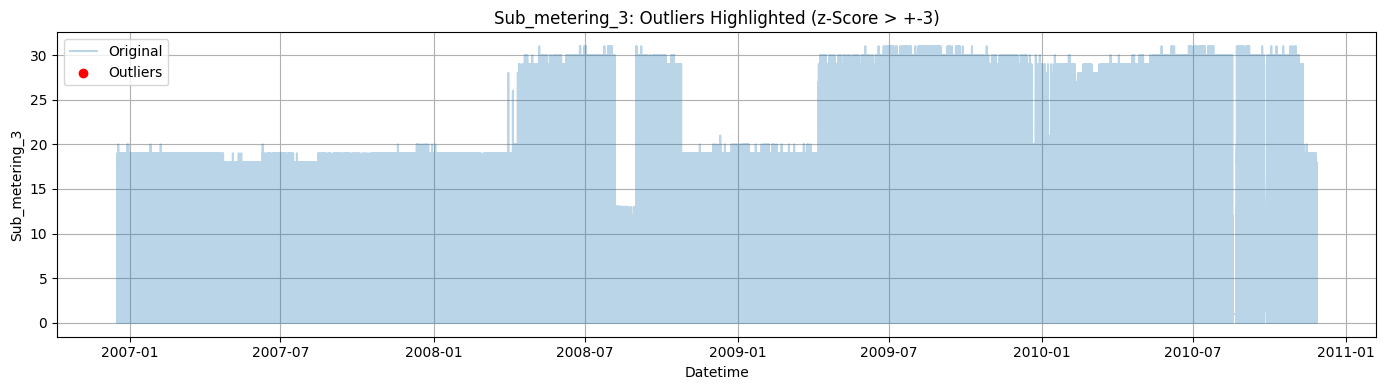

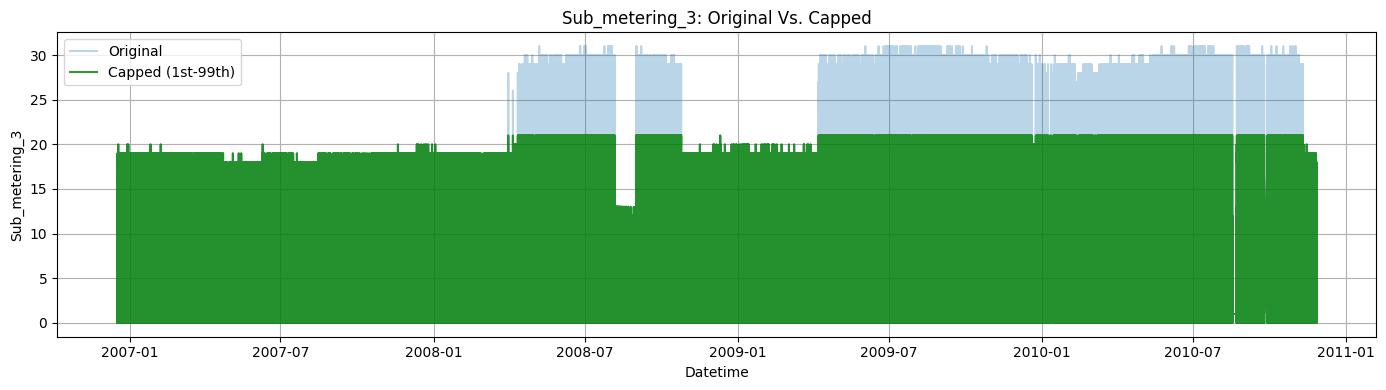

In [ ]:
# Outlier Detection and Capping Loop
# An outlier can be a anomalous value in the column or genuine power event.
# Visualising the outliers and the effects of capping will help decide which features need capping.
# Capping too much might discard valuable peaks.
# So capping at the 99th percentile ensured any genuine peak remains unaltered.

# This part was inspired by and coded using the help of ChatGPT.
# Prompt: can you help me create a loop to plot the outliers in the features
#     of my dataset and visualise the capped data to compare them? (use Z-score with a threshold of 3)
# The code given in the response then inspired the block of code below.

zscore_threshold = 3
features = data_copy.select_dtypes(include='number').columns
capped_data = data_copy.copy()

from scipy.stats import zscore

for col in features:
  data_cleaned[f'zscore_{col}'] = zscore(data_cleaned[col])
  outliers = data_cleaned[(data_cleaned[f'zscore_{col}'].abs() > zscore_threshold)]

  # Plotting the original values of the features (with outliers)
  plt.figure(figsize=(14, 4))
  plt.plot(data_cleaned.index, data_cleaned[col], label='Original', alpha=0.3)
  plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
  plt.title(f'{col}: Outliers Highlighted (z-Score > +-{zscore_threshold})')
  plt.xlabel('Datetime')
  plt.ylabel(col)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  # Capping values at the 1st and 99th percentiles
  lower_cap = data_cleaned[col].quantile(0.01)
  upper_cap = data_cleaned[col].quantile(0.99)
  capped_data[f'{col}_capped'] = data_cleaned[col].clip(lower=lower_cap, upper=upper_cap)

  # Plot capped values
  plt.figure(figsize=(14, 4))
  plt.plot(data_cleaned.index, data_cleaned[col], label='Original', alpha=0.3)
  plt.plot(data_cleaned.index, capped_data[f'{col}_capped'], label=f'Capped (1st-99th)', color='green', alpha=0.8)
  plt.title(f'{col}: Original Vs. Capped')
  plt.xlabel('Datetime')
  plt.ylabel(col)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
# Capping extreme outliers
# Based on the comparison of the graphs, Global_active_power and Global_reactive_power had extreme outliers.
# Only these two were capped (at 99th percentile) in the main dataset for modelling.

for col in ['Global_active_power', 'Global_reactive_power']:
  cap_value = data[col].quantile(0.99)
  data[col] = np.where(data[col] > cap_value, cap_value, data[col])

Resampling the Data

In [ ]:
# Resampling data by hour

data_hourly = data.resample('H').mean()
data_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,3.960500,0.219944,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.504733,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
# Resampling data by day

data_daily = data.resample('D').mean()
data_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,3.010308,0.087364,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.333978,0.156692,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.528854,0.111231,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.132260,0.104237,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.535765,0.111800,242.308062,6.467361,0.000000,1.838889,9.765972


In [ ]:
# Printing the shapes of the 3 datasets

print("Original data: ", data.shape)
print("Hourly data: ", data_hourly.shape)
print("Daily data: ", data_daily.shape)

Original data:  (2075259, 7)
Hourly data:  (34589, 7)
Daily data:  (1442, 7)


Scaling the data

In [ ]:
# Scaling
# it was wrapped in a function so it can be used easily for each dataset.

from sklearn.preprocessing import MinMaxScaler, StandardScaler
def scaling_data(df):
  # MinMaxScaler for skewed features (0 to 1 range)
  minmax_cols = ['Global_active_power', 'Global_reactive_power', 'Global_intensity',
               'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
  minmax = MinMaxScaler()
  df[minmax_cols] = minmax.fit_transform(df[minmax_cols])

  # StandardScaler for near-normal features (mean=0, std=1)
  std_cols = ['Voltage']
  std = StandardScaler()
  df[std_cols] = std.fit_transform(df[std_cols])

  return df

In [ ]:
# Scaling applied to minute-level, hourly, and daily data

data = scaling_data(data)
data_hourly = scaling_data(data_hourly)
data_daily = scaling_data(data_daily)

# Feature Engineering

The following sites were accessed to use as a reference for feature engineering:


*   https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0
*   https://machinelearningmastery.com/7-pandas-tricks-for-time-series-feature-engineering/
*   https://medium.com/@rahulholla1/advanced-feature-engineering-for-time-series-data-5f00e3a8ad29
*   https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
*   https://www.geeksforgeeks.org/data-analysis/feature-engineering-for-time-series-data-methods-and-applications/


In [ ]:
# Function for time-based feature engineering

def time_based_features(df):
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['day'] = df.index.day
  df['day_of_week'] = df.index.dayofweek
  return df

In [ ]:
# Function for seasons
# These seasons are absed on the seasons of France.
# This is because the recorded household is in a city 7Km from Paris, France.
# seasons by month -- https://frenchmoments.eu/seasons-of-the-year-in-france/ used as refernce.

def seasons(df):
  def get_season(month):
    if month in [12, 1, 2]:
      return 'Winter'
    elif month in [3, 4, 5]:
      return 'Spring'
    elif month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'Autumn'
  df['season'] = df['month'].apply(get_season)
  # One hot encoding is done as models require numerical values.
  df = pd.get_dummies(df, columns=['season'], drop_first=True)
  return df

In [ ]:
data = time_based_features(data)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week
Datetime,,,,,,,,,,,
2006-12-16 17:24:00,0.869383,0.878151,-1.850903,0.377593,0.0,0.0125,0.548387,2006,12,16,5
2006-12-16 17:25:00,1.000000,0.915966,-2.224618,0.473029,0.0,0.0125,0.516129,2006,12,16,5
2006-12-16 17:26:00,1.000000,1.000000,-2.329629,0.473029,0.0,0.0250,0.548387,2006,12,16,5
2006-12-16 17:27:00,1.000000,1.000000,-2.190644,0.473029,0.0,0.0125,0.548387,2006,12,16,5
2006-12-16 17:28:00,0.753885,1.000000,-1.591465,0.323651,0.0,0.0125,0.548387,2006,12,16,5


In [ ]:
data = seasons(data)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week,season_Spring,season_Summer,season_Winter
Datetime,,,,,,,,,,,,,,
2006-12-16 17:24:00,0.869383,0.878151,-1.850903,0.377593,0.0,0.0125,0.548387,2006,12,16,5,False,False,True
2006-12-16 17:25:00,1.000000,0.915966,-2.224618,0.473029,0.0,0.0125,0.516129,2006,12,16,5,False,False,True
2006-12-16 17:26:00,1.000000,1.000000,-2.329629,0.473029,0.0,0.0250,0.548387,2006,12,16,5,False,False,True
2006-12-16 17:27:00,1.000000,1.000000,-2.190644,0.473029,0.0,0.0125,0.548387,2006,12,16,5,False,False,True
2006-12-16 17:28:00,0.753885,1.000000,-1.591465,0.323651,0.0,0.0125,0.548387,2006,12,16,5,False,False,True


In [ ]:
data_hourly = time_based_features(data_hourly)
data_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week
Datetime,,,,,,,,,,,
2006-12-16 17:00:00,0.814774,0.462068,-2.061878,0.631157,0.0,0.011366,0.687521,2006,12,16,5
2006-12-16 18:00:00,0.717981,0.168137,-2.083108,0.541487,0.0,0.144652,0.687748,2006,12,16,5
2006-12-16 19:00:00,0.695788,0.179062,-2.532100,0.502152,0.0,0.030869,0.680272,2006,12,16,5
2006-12-16 20:00:00,0.667825,0.157773,-2.252576,0.481110,0.0,0.000000,0.684350,2006,12,16,5
2006-12-16 21:00:00,0.622781,0.161064,-1.224046,0.449904,0.0,0.008973,0.702019,2006,12,16,5


In [ ]:
data_hourly = seasons(data_hourly)
data_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week,season_Spring,season_Summer,season_Winter
Datetime,,,,,,,,,,,,,,
2006-12-16 17:00:00,0.814774,0.462068,-2.061878,0.631157,0.0,0.011366,0.687521,2006,12,16,5,False,False,True
2006-12-16 18:00:00,0.717981,0.168137,-2.083108,0.541487,0.0,0.144652,0.687748,2006,12,16,5,False,False,True
2006-12-16 19:00:00,0.695788,0.179062,-2.532100,0.502152,0.0,0.030869,0.680272,2006,12,16,5,False,False,True
2006-12-16 20:00:00,0.667825,0.157773,-2.252576,0.481110,0.0,0.000000,0.684350,2006,12,16,5,False,False,True
2006-12-16 21:00:00,0.622781,0.161064,-1.224046,0.449904,0.0,0.008973,0.702019,2006,12,16,5,False,False,True


In [ ]:
data_daily = time_based_features(data_daily)
data_daily = seasons(data_daily)

In [ ]:
data_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week,season_Spring,season_Summer,season_Winter
Datetime,,,,,,,,,,,,,,
2006-12-16,0.937993,0.267969,-2.238146,0.928499,0.000000,0.163965,0.754442,2006,12,16,5,False,False,True
2006-12-17,0.714339,0.532628,-0.362757,0.695226,0.181130,0.345776,0.561892,2006,12,17,6,False,False,True
2006-12-18,0.448094,0.359081,0.195803,0.424618,0.094708,0.216451,0.590406,2006,12,18,0,False,False,True
2006-12-19,0.316945,0.332385,0.570376,0.311508,0.074751,0.627798,0.261003,2006,12,19,1,False,False,True
2006-12-20,0.450380,0.361255,0.721036,0.428075,0.000000,0.218680,0.592301,2006,12,20,2,False,False,True


In [ ]:
# Function for holidays
# The calendar for France was imported to flag holidays.

import holidays
def holiday(df):
  france_holidays = holidays.France()
  df['is_holiday'] = df.index.to_series().apply(lambda x: 1 if x in france_holidays else 0)
  return df

In [ ]:
data = holiday(data)
data_hourly = holiday(data_hourly)
data_daily = holiday(data_daily)

In [ ]:
# Feature engineering lag and rolling features

# Lag features for minute level data
# Example Lags: 1 hour, 1 day, 1 week
lags_min = [60, 1440, 10080] # 1 hr, 1 day and 1 week in minutes respectively
for lag in lags_min:
  data[f'Global_active_power_lag_{lag}'] = data['Global_active_power'].shift(lag)


# Rolling Window Statistics for minute data
# Example Windows: 1 day, 7days (in minutes)
windows_min = [1440, 10080] # 1 day and 7 days in minutes respectively
for window in windows_min:
  data[f'GAP_rolling_mean_{window}'] = data['Global_active_power'].rolling(window=window).mean()
  data[f'GAP_rolling_std_{window}'] = data['Global_active_power'].rolling(window=window).std()
  data[f'GAP_rolling_max_{window}'] = data['Global_active_power'].rolling(window=window).max()

data.dropna(inplace=True)

# Lag Features for hourly data
lags_hr = [1, 24, 168] # 1 hour, 1 day and 1 week in hours
for lag in lags_hr:
  data_hourly[f'Global_active_power_lag_{lag}'] = data_hourly['Global_active_power'].shift(lag)

# Rolling Window Statistics for hourly data
windows_hr = [24, 168]
for window in windows_hr:
  data_hourly[f'GAP_rolling_mean_{window}'] = data_hourly['Global_active_power'].rolling(window=window).mean()
  data_hourly[f'GAP_rolling_std_{window}'] = data_hourly['Global_active_power'].rolling(window=window).std()
  data_hourly[f'GAP_rolling_max_{window}'] = data_hourly['Global_active_power'].rolling(window=window).max()

data_hourly.dropna(inplace=True)

# Lag Features for daily data
lags_dly = [1, 7, 30] # 1 day, 1 week, 1 month (approx.) in days
for lag in lags_dly:
  data_daily[f'Global_active_power_lag_{lag}'] = data_daily['Global_active_power'].shift(lag)

# Rolling Window Statistics for daily data
windows_dly = [7, 30]
for window in windows_dly:
  data_daily[f'GAP_rolling_mean_{window}'] = data_daily['Global_active_power'].rolling(window=window).mean()
  data_daily[f'GAP_rolling_std_{window}'] = data_daily['Global_active_power'].rolling(window=window).std()
  data_daily[f'GAP_rolling_max_{window}'] = data_daily['Global_active_power'].rolling(window=window).max()

data_daily.dropna(inplace=True)

In [ ]:
data.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,...,is_holiday,Global_active_power_lag_60,Global_active_power_lag_1440,Global_active_power_lag_10080,GAP_rolling_mean_1440,GAP_rolling_std_1440,GAP_rolling_max_1440,GAP_rolling_mean_10080,GAP_rolling_std_10080,GAP_rolling_max_10080
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-23 17:24:00,0.99706,0.289916,-2.829974,0.427386,0.011364,0.0125,0.516129,2006,12,23,...,0,0.865603,0.377152,0.869383,0.601355,0.263321,1.0,0.351179,0.274803,1.0
2006-12-23 17:25:00,0.99664,0.289916,-2.796000,0.427386,0.022727,0.0250,0.548387,2006,12,23,...,0,0.556069,0.375052,1.000000,0.601786,0.263459,1.0,0.351179,0.274802,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2065179 entries, 2006-12-23 17:24:00 to 2010-11-26 21:02:00
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Global_active_power            float64
 1   Global_reactive_power          float64
 2   Voltage                        float64
 3   Global_intensity               float64
 4   Sub_metering_1                 float64
 5   Sub_metering_2                 float64
 6   Sub_metering_3                 float64
 7   year                           int32  
 8   month                          int32  
 9   day                            int32  
 10  day_of_week                    int32  
 11  season_Spring                  bool   
 12  season_Summer                  bool   
 13  season_Winter                  bool   
 14  is_holiday                     int64  
 15  Global_active_power_lag_60     float64
 16  Global_active_power_lag_1440   float64
 17  Global_active

In [ ]:
data_hourly.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,...,is_holiday,Global_active_power_lag_1,Global_active_power_lag_24,Global_active_power_lag_168,GAP_rolling_mean_24,GAP_rolling_std_24,GAP_rolling_max_24,GAP_rolling_mean_168,GAP_rolling_std_168,GAP_rolling_max_168
Datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-23 17:00:00,0.962155,0.453711,-2.394948,0.819823,0.334597,0.014358,0.682990,2006,12,23,...,0,0.879810,0.291548,0.814774,0.615321,0.201296,0.962155,0.345477,0.239416,0.962155
2006-12-23 18:00:00,0.790280,0.209594,-0.943579,0.568867,0.000000,0.000359,0.707456,2006,12,23,...,0,0.962155,0.544308,0.717981,0.625570,0.203770,0.962155,0.345907,0.240154,0.962155


In [ ]:
data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34421 entries, 2006-12-23 17:00:00 to 2010-11-26 21:00:00
Freq: h
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Global_active_power          34421 non-null  float64
 1   Global_reactive_power        34421 non-null  float64
 2   Voltage                      34421 non-null  float64
 3   Global_intensity             34421 non-null  float64
 4   Sub_metering_1               34421 non-null  float64
 5   Sub_metering_2               34421 non-null  float64
 6   Sub_metering_3               34421 non-null  float64
 7   year                         34421 non-null  int32  
 8   month                        34421 non-null  int32  
 9   day                          34421 non-null  int32  
 10  day_of_week                  34421 non-null  int32  
 11  season_Spring                34421 non-null  bool   
 12  season_Summer                34

In [ ]:
data_daily.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,...,is_holiday,Global_active_power_lag_1,Global_active_power_lag_7,Global_active_power_lag_30,GAP_rolling_mean_7,GAP_rolling_std_7,GAP_rolling_max_7,GAP_rolling_mean_30,GAP_rolling_std_30,GAP_rolling_max_30
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-15,0.435197,0.397028,0.200300,0.412504,0.097915,0.184904,0.638630,2007,1,15,...,0,0.621874,0.457206,0.937993,0.457168,0.128250,0.626204,0.498951,0.185960,1.0
2007-01-16,0.329385,0.415919,0.543755,0.315259,0.183803,0.053184,0.277261,2007,1,16,...,0,0.435197,0.361176,0.714339,0.452626,0.132701,0.626204,0.486119,0.183854,1.0


In [ ]:
# Saving the prepared datasets

filepath1 = '/content/drive/MyDrive/dissertation/data/data_minute.csv'
data.to_csv(filepath1)

filepath2 = '/content/drive/MyDrive/dissertation/data/data_hourly.csv'
data_hourly.to_csv(filepath2)

filepath3 = '/content/drive/MyDrive/dissertation/data/data_daily.csv'
data_daily.to_csv(filepath3)

Correlation Analysis of the final dataset

In [ ]:
corr_mat = data.corr()

In [ ]:
# Correlation Check After Feature Engineering

target = 'Global_active_power'

num_cols = data.select_dtypes(include=np.number).columns #select only numerical columns for correlation calculation
corr_mat = data[num_cols].corr()
corr_target = corr_mat[target].sort_values(ascending=False) #correlation calculation w.r.t target variable

print("Correlation matrix for all features: \n")
print(corr_mat)

print("Correlation with Global_active_power: \n")
print(corr_target)

Correlation matrix for all features: 

                               Global_active_power  Global_reactive_power  \
Global_active_power                       1.000000               0.240052   
Global_reactive_power                     0.240052               1.000000   
Voltage                                  -0.392293              -0.107240   
Global_intensity                          0.992293               0.258615   
Sub_metering_1                            0.470999               0.120945   
Sub_metering_2                            0.407353               0.139250   
Sub_metering_3                            0.654842               0.085821   
year                                     -0.023654               0.044202   
month                                    -0.039143               0.024187   
day                                      -0.001890              -0.001102   
day_of_week                               0.058668               0.072392   
hour                                 

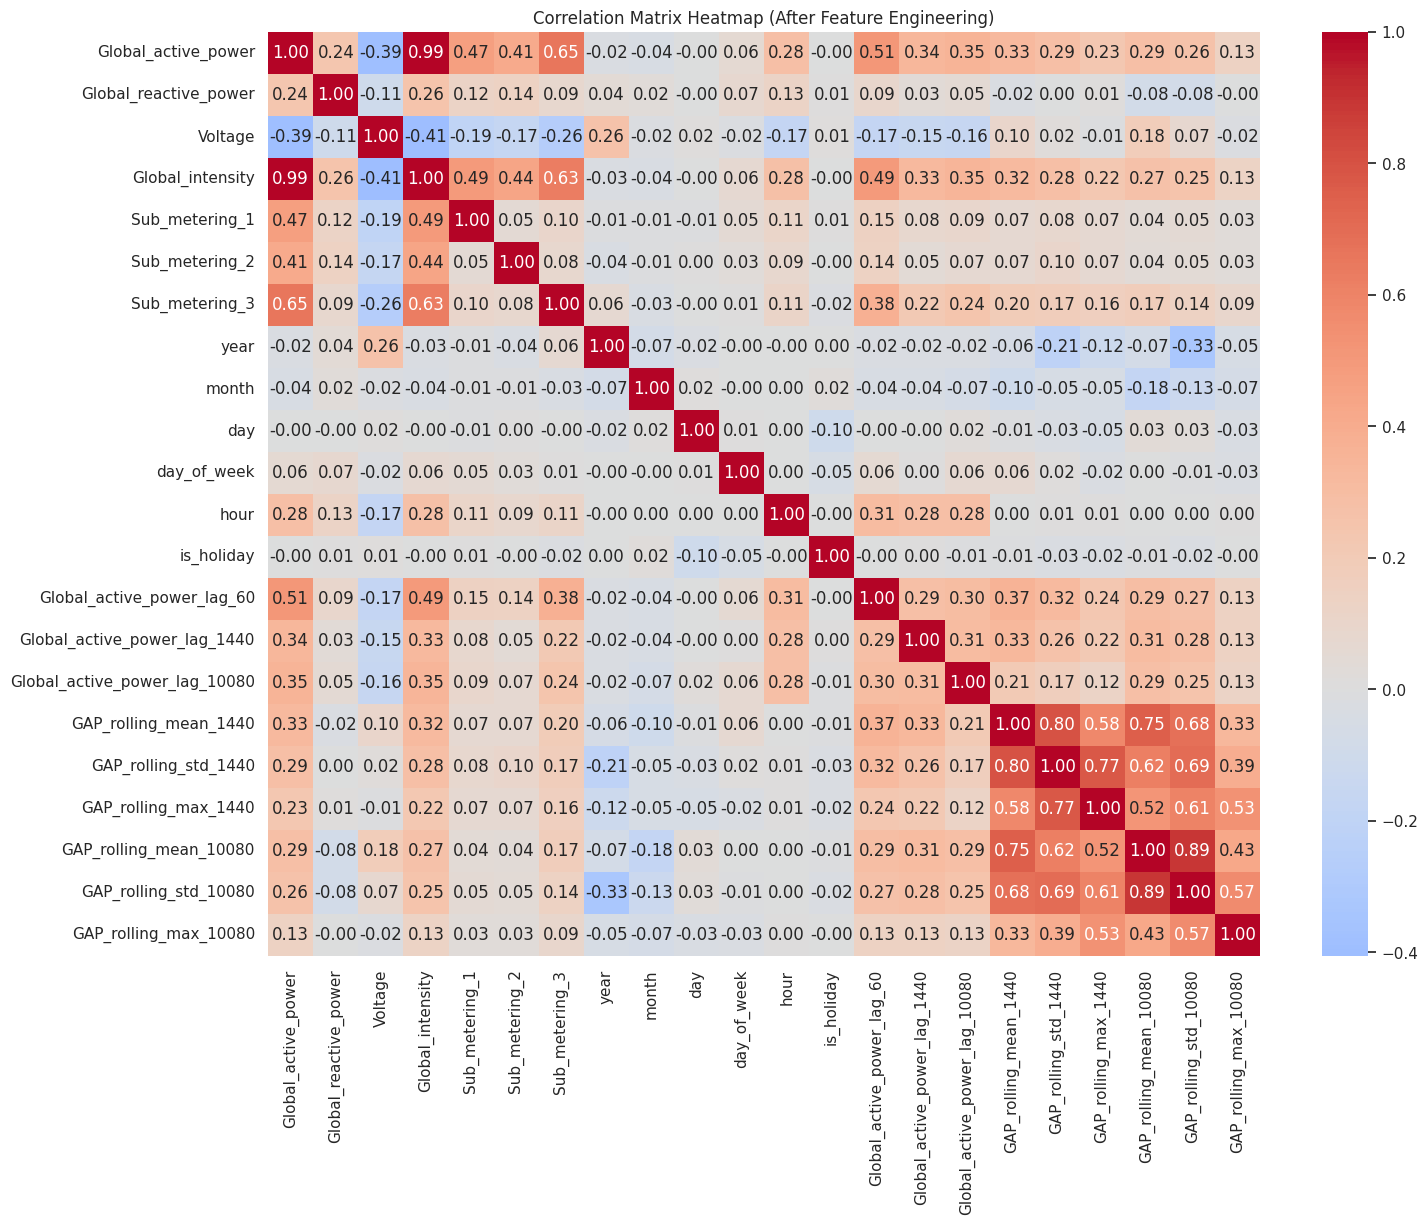

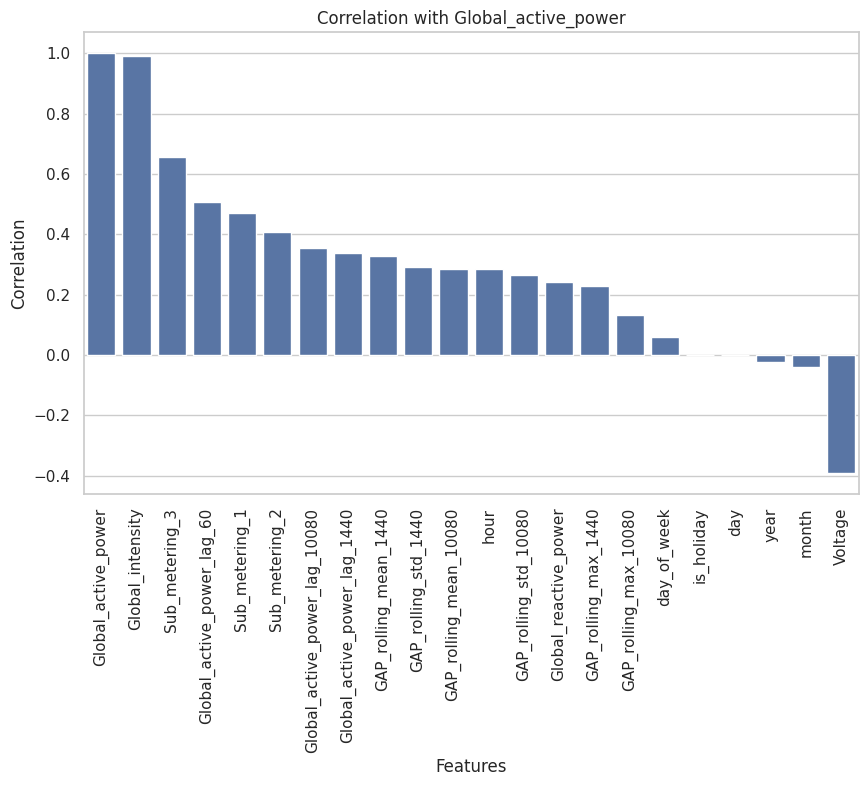

In [ ]:
# Plot the correlation matrix heatmap for all features

plt.figure(figsize=(16, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix Heatmap (After Feature Engineering)")
plt.show()

# Plot bar chart of correlations with target

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target.index, y=corr_target.values)
plt.title("Correlation with Global_active_power")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()